# Introduction
(?)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from plotnine import *
pd.set_option('mode.chained_assignment',None)

# Data Collection
(Just load)

In [2]:
url = "https://github.com/data-analytics-in-business/gabor-firm-exit-case-study/raw/main/data/sample_2012.csv"
df = pd.read_csv(url)
df.head()

,comp_id,begin,end,COGS,amort,curr_assets,curr_liab,extra_exp,extra_inc,extra_profit_loss,...,origin,nace_main,ind2,ind,urban_m,region_m,founded_date,exit_date,labor_avg,default
0,1001541.0,2012-01-01,2012-12-31,NaN,481.481476,9629.629883,1303.703735,0.0,0.000000,0.000000,...,Domestic,5610.0,56.0,3.0,3,Central,2008-02-24,NaN,NaN,0
1,1002029.0,2012-01-01,2012-12-31,NaN,14929.629883,203885.187500,120444.453125,0.0,0.000000,0.000000,...,Domestic,2711.0,27.0,2.0,3,East,2006-07-03,NaN,0.458333,0
2,1003200.0,2012-01-01,2012-12-31,NaN,25.925926,22.222221,10996.295898,0.0,0.000000,0.000000,...,Domestic,5630.0,56.0,3.0,1,Central,2003-10-21,2014-08-09,NaN,1
3,1011889.0,2012-01-01,2012-12-31,NaN,36625.925781,160166.671875,18911.111328,0.0,0.000000,0.000000,...,Domestic,5510.0,55.0,3.0,2,West,1992-11-09,NaN,1.621212,0
4,1014183.0,2012-01-01,2012-12-31,NaN,12551.851562,199903.703125,8274.074219,0.0,7.407407,7.407407,...,Domestic,5510.0,55.0,3.0,2,Central,2001-12-21,NaN,0.715278,0


# Feature Engineering

## Sales

In [3]:
df['default'] = df['default'].astype(str)

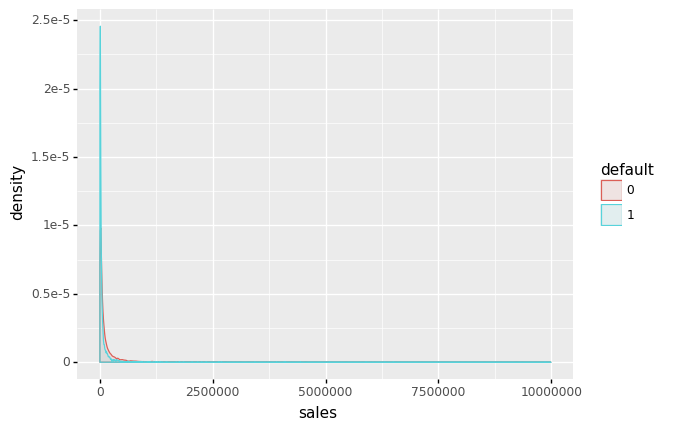

<ggplot: (286060213)>

In [4]:
(ggplot(df, aes(x='sales', color='default', fill='default'))
     + geom_density(alpha=0.1)
)

Looks like a difference, but...

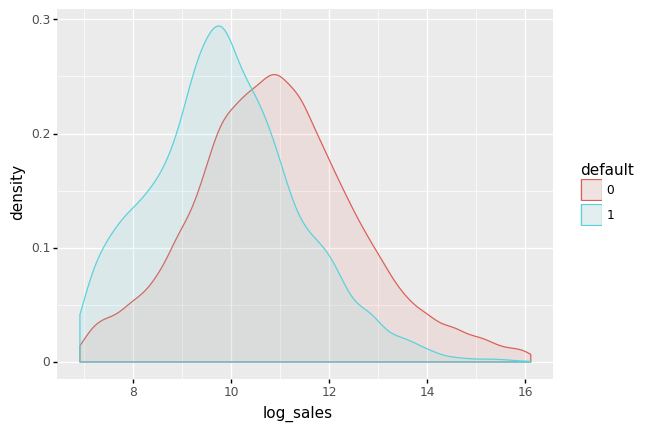

<ggplot: (321775377)>

In [5]:
df['log_sales'] = np.log(df['sales'])
(ggplot(df, aes(x='log_sales', color='default', fill='default'))
     + geom_density(alpha=0.1)
)

## Profit and Loss

/Users/matt/Bristol/Github/data-analytics-in-business/gabor-firm-exit-case-study/.env/lib/python3.7/site-packages/plotnine/layer.py:324: PlotnineWarning: stat_density : Removed 10 rows containing non-finite values.


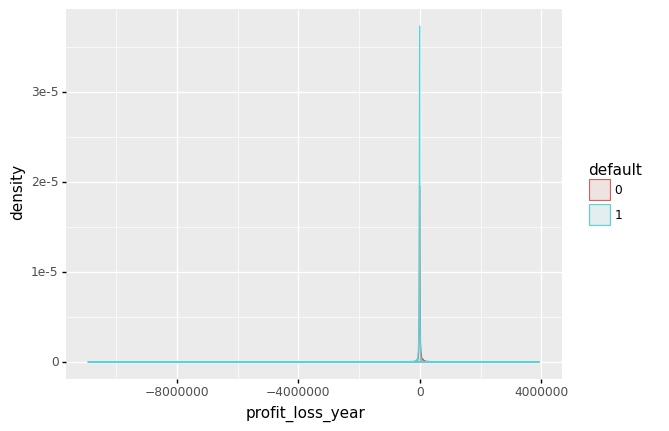

<ggplot: (322008629)>

In [6]:
(ggplot(df, aes(x='profit_loss_year', color='default', fill='default'))
     + geom_density(alpha=0.1)
)

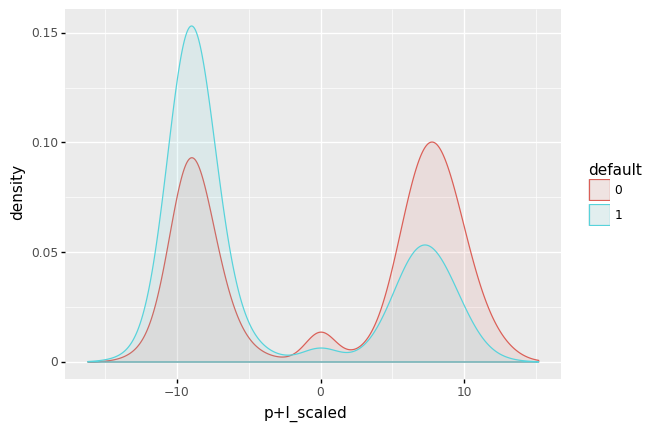

<ggplot: (322279777)>

In [7]:
df['p+l_scaled'] = np.sign(df['profit_loss_year'])*(np.log(np.abs(df['profit_loss_year'])+1))
df['p+l_scaled'] = np.where(df['p+l_scaled'].isna(), 0, df['p+l_scaled'])

(ggplot(df, aes(x='p+l_scaled', color='default', fill='default'))
     + geom_density(alpha=0.1)
)

## Industry type

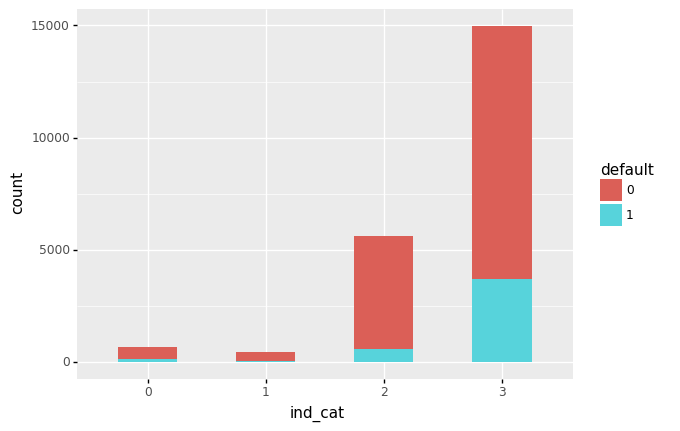

<ggplot: (322869829)>

In [8]:
#df['ind'].value_counts()
df['ind_cat'] = df['ind']
df['ind_cat'] = np.where(df['ind_cat'].isna(), 0, df['ind_cat'])
df['ind_cat'] = df['ind_cat'].astype(int).astype(str)
(ggplot(df, aes(x='ind_cat',fill='default'))
 + geom_histogram(binwidth=0.5)
)

# Analytics Base Table

In [9]:
df_ABT = df[['log_sales','p+l_scaled','ind_cat','default']]
df_ABT.to_csv('../data/sample_2012_ABT.csv', index=False)
df_ABT.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21723 entries, 0 to 21722
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   log_sales   21723 non-null  float64
 1   p+l_scaled  21723 non-null  float64
 2   ind_cat     21723 non-null  object 
 3   default     21723 non-null  object 
dtypes: float64(2), object(2)
memory usage: 679.0+ KB
